### **Question 3:**
#### **How do regional differences in lifestyle factors and medical conditions relate to the prevalence of Alzheimer’s?**

**Hypothesis:**
- Countries with lower education and income levels, higher air pollution exposure, and more urban living will have a higher prevalence of Alzheimer’s.

---

#### **Prevalence Maps**

In [12]:
# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

/var/folders/90/rz4v4qy12qz5mjr1g926qn2w0000gp/T/ipykernel_68978/3195294602.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  world['Alzheimer'] = world['Alzheimer'].replace({'Yes': 1, 'No': 0}).astype(float)


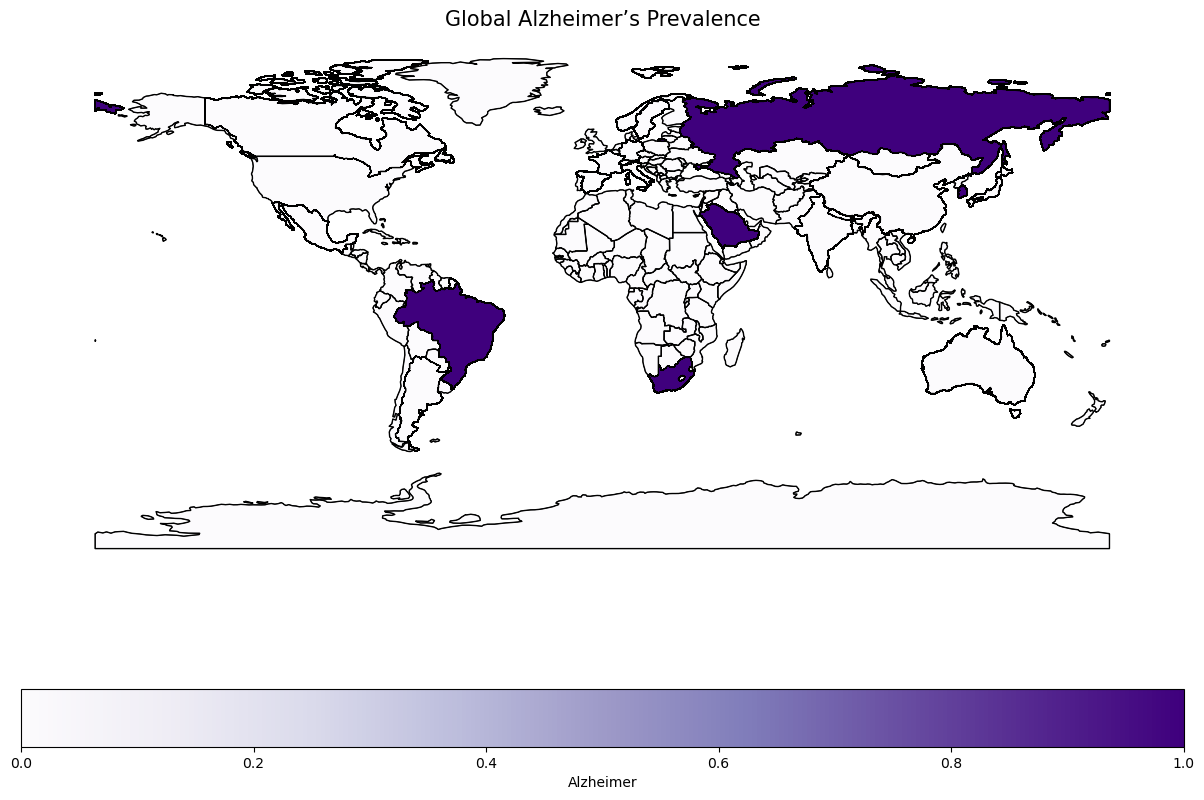

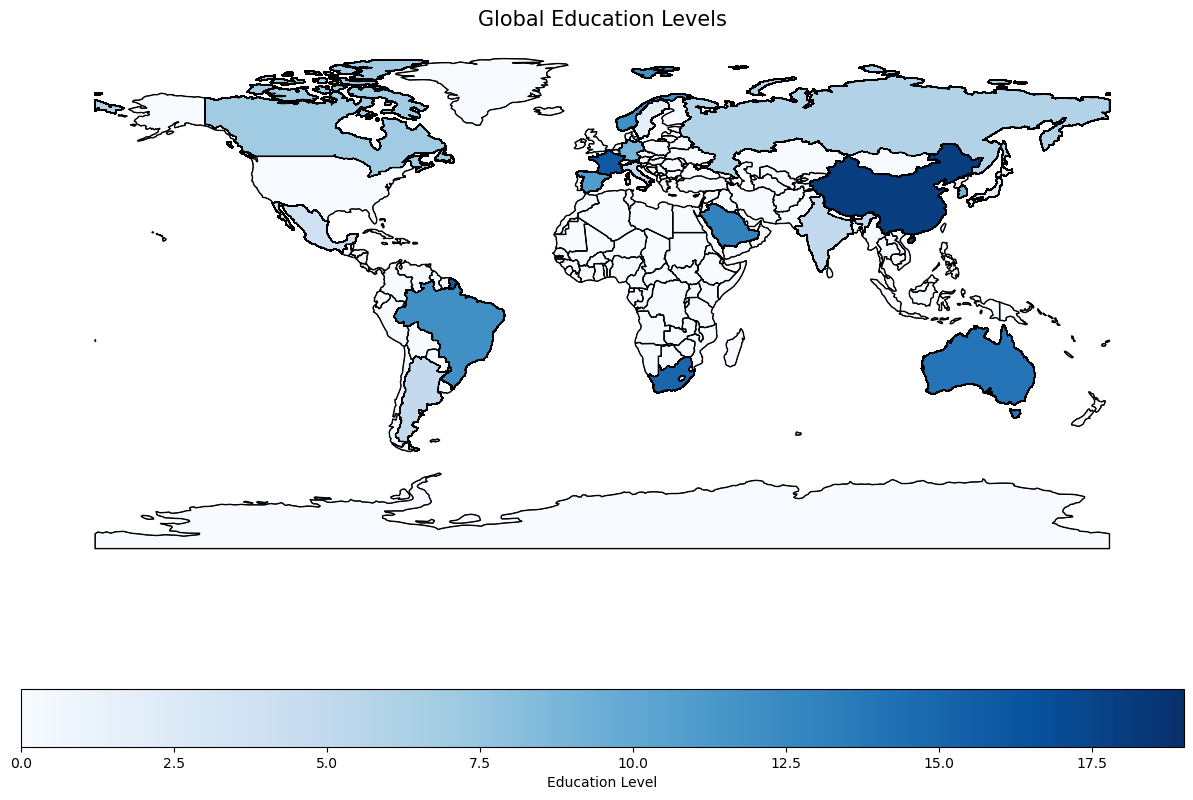

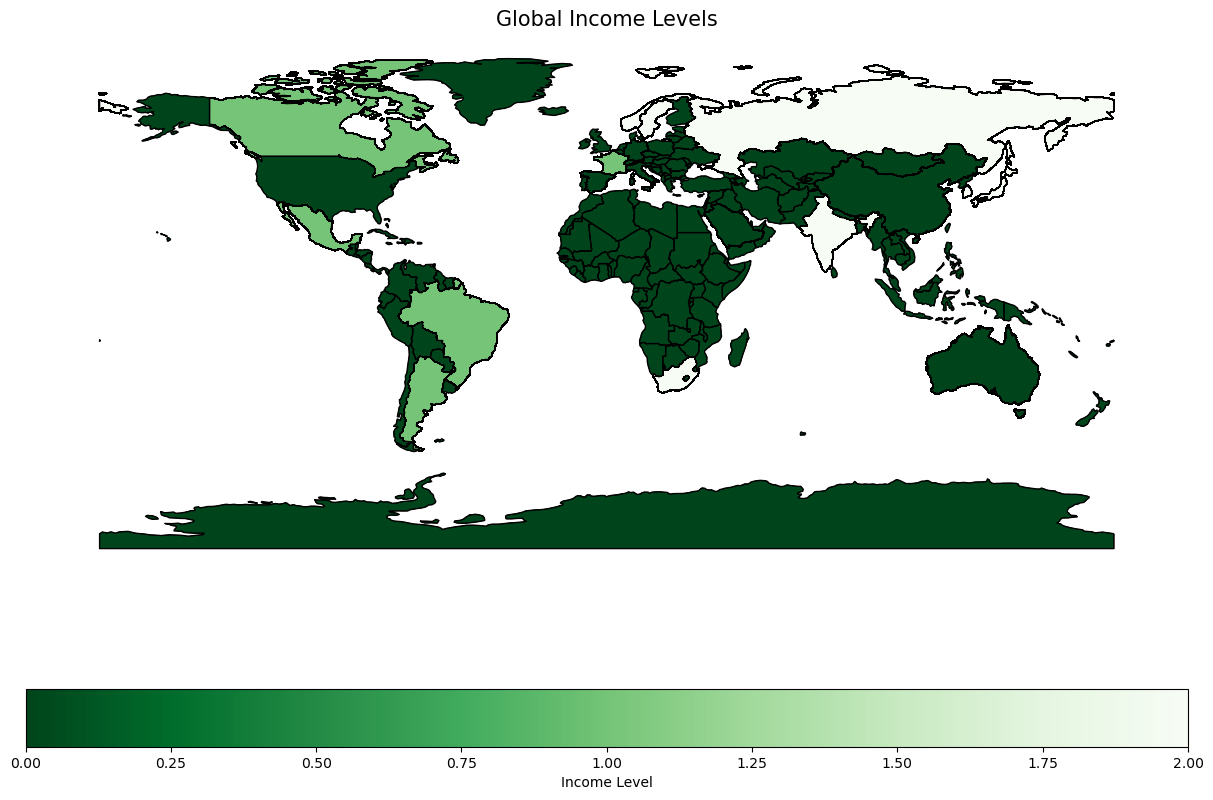

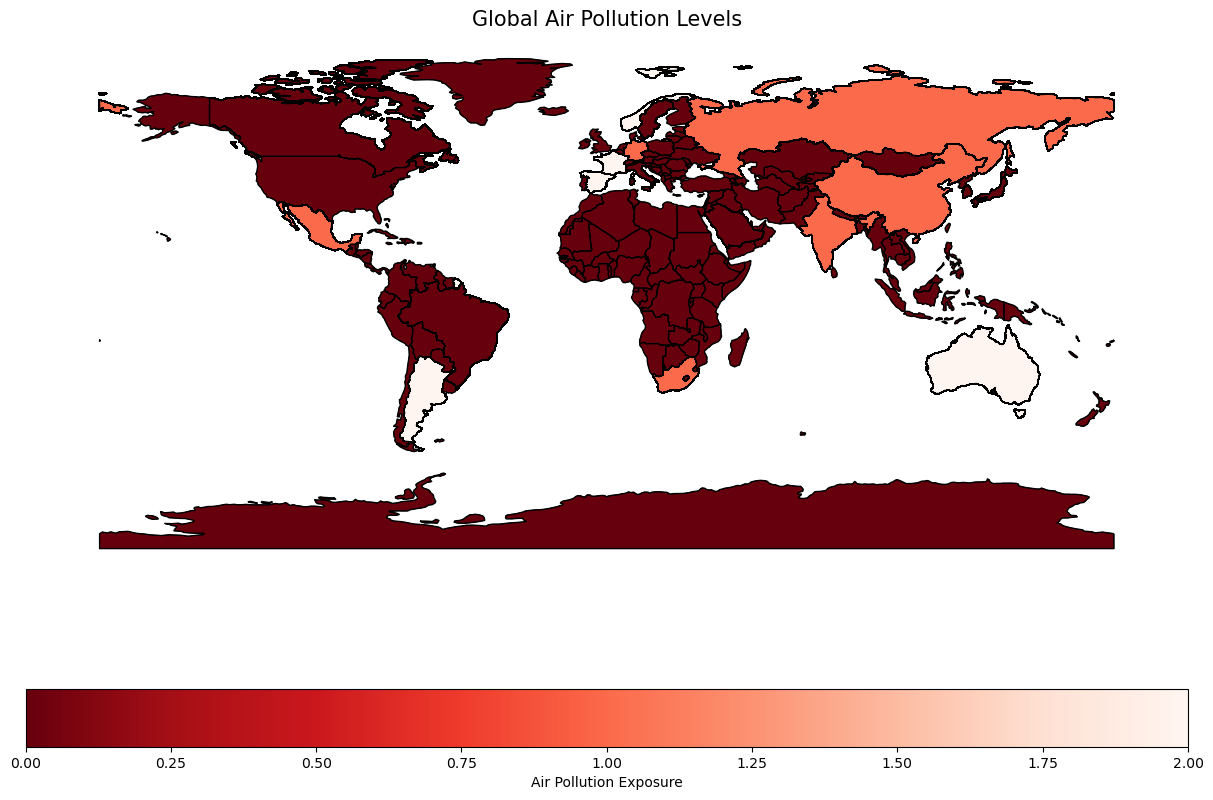

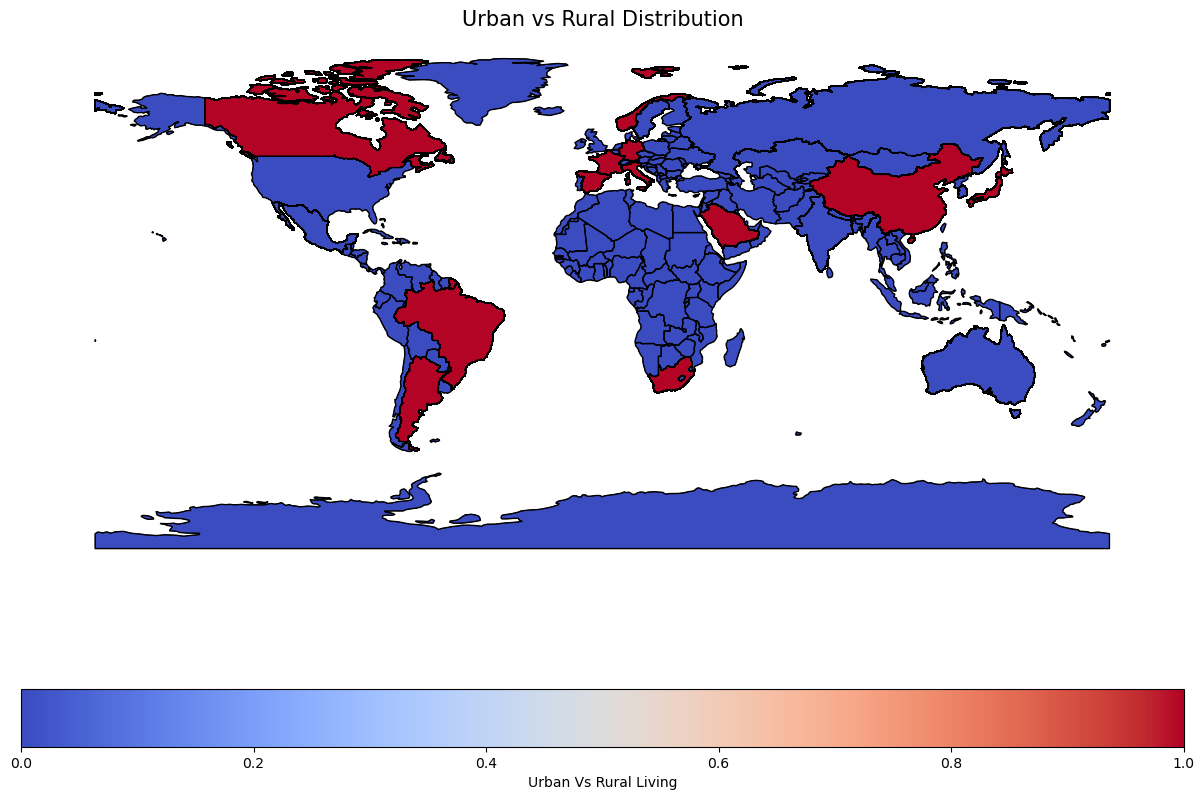

In [13]:
# Load dataset with Alzheimer's prevalence and regional factors
data = pd.read_csv("alzheimers_prediction_dataset.csv")

# Load world shapefile (downloaded from Natural Earth)
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Make sure the country names match between datasets
world["ADMIN"] = world["ADMIN"].astype(str)
data["Country"] = data["Country"].astype(str)

# Merge world map with Alzheimer's dataset
world = world.merge(data, how = 'left', left_on = 'ADMIN', right_on = 'Country')

# Convert categorical values to numeric if needed
world['Alzheimer'] = world['Alzheimer'].replace({'Yes': 1, 'No': 0}).astype(float)

category_mappings = {
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Air Pollution Exposure': {'Low': 0, 'Medium': 1, 'High': 2},
    'Urban vs Rural Living': {'Urban': 1, 'Rural': 0}
}

for col, mapping in category_mappings.items():
    if col in world.columns:
        world[col] = world[col].map(mapping)

# Define function to create shaded choropleth maps
def plot_shaded_map(column, title, cmap = 'OrRd', reverse = False):
    if column not in world.columns:
        print(f"Error: Column '{column}' not found in dataframe.")
        return

    world[column] = pd.to_numeric(world[column], errors = 'coerce')
    world[column] = world[column].fillna(0)  # Replace NaNs with 0

    # Reverse color map if needed
    if reverse:
        cmap += "_r"

    fig, ax = plt.subplots(1, 1, figsize = (15, 10))
    world.boundary.plot(ax = ax, color = "black", linewidth = 0.5)  # Country borders
    world.plot(column = column, ax = ax, legend = True,
               legend_kwds = {'label': column.replace('_', ' ').title(),
                            'orientation': 'horizontal'},
               cmap = cmap, edgecolor = 'black')

    plt.title(title, fontsize = 15)
    plt.axis('off')  # Remove axis for better visualization
    plt.show()

# Plot updated maps
plot_shaded_map('Alzheimer', 'Global Alzheimer’s Prevalence', cmap = 'Purples')
plot_shaded_map('Education Level', 'Global Education Levels', cmap = 'Blues')
plot_shaded_map('Income Level', 'Global Income Levels', cmap = 'Greens', reverse = True)
plot_shaded_map('Air Pollution Exposure', 'Global Air Pollution Levels', cmap = 'Reds', reverse = True)
plot_shaded_map('Urban vs Rural Living', 'Urban vs Rural Distribution', cmap = 'coolwarm')

---

#### **Clusters**

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/var/folders/90/rz4v4qy12qz5mjr1g926qn2w0000gp/T/ipykernel_68978/182882070.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  world['Alzheimer'] = world['Alzheimer'].replace({'Yes': 1, 'No': 0}).astype(float)


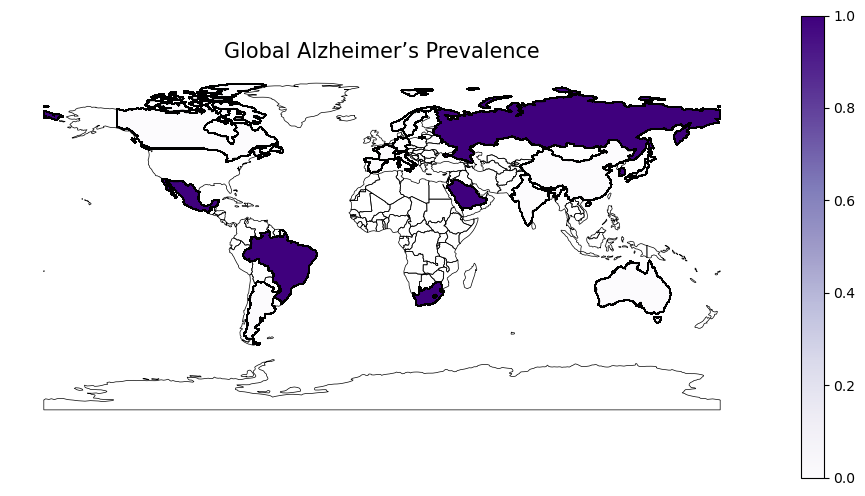

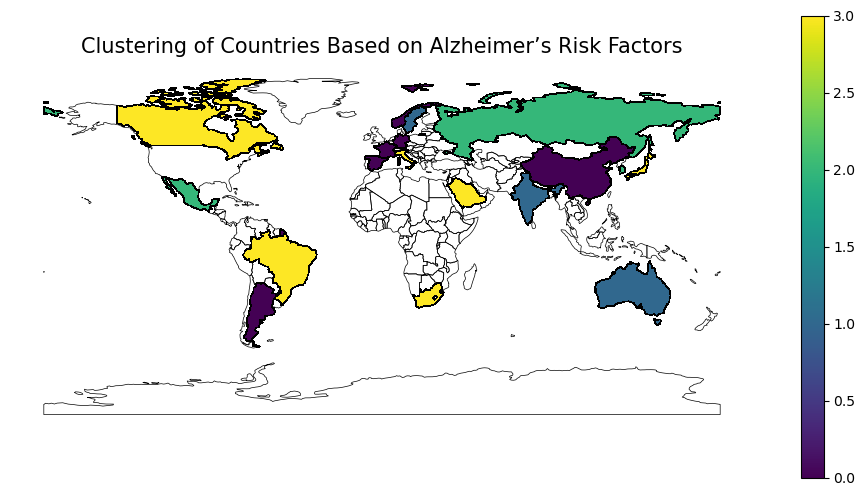

Cluster Summary:
         Alzheimer  Education Level  Income Level  Air Pollution Exposure  \
Cluster                                                                     
0         0.394570        10.196418      0.764298                1.675332   
1         0.000000         9.523636      1.011429                1.010909   
2         1.000000         9.517057      0.982609                1.024080   
3         0.427524         8.956571      1.260011                0.324309   

         Urban vs Rural Living  
Cluster                         
0                          1.0  
1                          0.0  
2                          0.0  
3                          1.0  


In [15]:
# Load dataset with Alzheimer's prevalence and regional factors
data = pd.read_csv("alzheimers_prediction_dataset.csv")

# Load world shapefile (downloaded from Natural Earth)
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Make sure country names match between datasets
world["ADMIN"] = world["ADMIN"].astype(str)
data["Country"] = data["Country"].astype(str)

# Merge world map with Alzheimer's dataset
world = world.merge(data, how='left', left_on = 'ADMIN', right_on = 'Country')

# Select relevant features for clustering
features = ['Alzheimer', 'Education Level', 'Income Level', 'Air Pollution Exposure', 'Urban vs Rural Living']
features = [col for col in features if col in world.columns]

# Convert categorical values ('Yes'/'No') to numbers
world['Alzheimer'] = world['Alzheimer'].replace({'Yes': 1, 'No': 0}).astype(float)

# Convert categorical values to numerical values
category_mappings = {
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Air Pollution Exposure': {'Low': 0, 'Medium': 1, 'High': 2},
    'Urban vs Rural Living': {'Urban': 1, 'Rural': 0}
}

for col, mapping in category_mappings.items():
    if col in world.columns:
        world[col] = world[col].map(mapping)

# Drop rows where the selected features are NaN
world_cluster = world.dropna(subset=features).copy()

# Standardize data for clustering
scaler = StandardScaler()
world_cluster_scaled = scaler.fit_transform(world_cluster[features])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)
world_cluster['Cluster'] = kmeans.fit_predict(world_cluster_scaled)

# Function to plot shaded maps
def plot_shaded_map(column, title, cmap = 'OrRd'):
    if column not in world.columns:
        print(f"Error: Column '{column}' not found in dataframe.")
        return

    fig, ax = plt.subplots(figsize = (12, 6))
    world.boundary.plot(ax = ax, color = "black", linewidth = 0.5)
    world.plot(column = column, ax = ax, legend = True, cmap = cmap, edgecolor = 'black')
    plt.title(title, fontsize = 15)
    plt.axis('off')
    plt.show()

# Function to plot cluster map
def plot_cluster_map(title):
    fig, ax = plt.subplots(figsize = (12, 6))
    world.boundary.plot(ax = ax, color = "black", linewidth = 0.5)
    world_cluster.plot(column = 'Cluster', ax = ax, legend = True, cmap = 'viridis')
    plt.title(title, fontsize = 15)
    plt.axis('off')
    plt.show()

# Plot Alzheimer's prevalence map
plot_shaded_map('Alzheimer', 'Global Alzheimer’s Prevalence', cmap = 'Purples')

# Plot clustering results
plot_cluster_map("Clustering of Countries Based on Alzheimer’s Risk Factors")

# Display cluster summary
cluster_summary = world_cluster.groupby('Cluster')[features].mean()
print("Cluster Summary:")
print(cluster_summary)

---

In [16]:
# Load dataset with Alzheimer's prevalence and regional factors
data = pd.read_csv("alzheimers_prediction_dataset.csv")

# Load world shapefile (downloaded from Natural Earth)
world = gpd.read_file("ne_110m_admin_0_countries.shp")

print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


## **Findings and Analysis**

### **1. Alzheimer’s Prevalence Across Regions**
The **Global Alzheimer’s Prevalence** map demonstrates that certain countries are associated with notably higher reported cases of Alzheimer's. The countries shaded in darker purple (such as **Russia, Brazil, and certain regions in Africa**) have relatively higher rates, while the lighter-shaded countries are correlated with fewer cases. This indicates that Alzheimer's prevalence does not have a uniform distribution globally, and clusters in specific regions instead.

From the **cluster analysis**, the summarized mean prevalence values demonstrate that **Cluster 0 has the highest prevalence rate (~0.395), and then Cluster 3 (~0.427). Clusters 1 and 2 show minimal prevalence (~0.000–0.400) though.** The hypothesis is supported by these findings as lifestyle and environmental factors do seem to contribute to the Alzheimer's distribution around the world.

---

### **2. Education Level & Its Correlation**
The **Global Education Levels** map, which is shaded in **blue**, displays the countries with higher education levels. **North America, some parts of Europe, and East Asia** have the highest education levels, whereas **many countries in Africa, South Asia, and Latin America** are on the lower end of the scale.

The **cluster summary** shows that **Cluster 0 has the highest average education level (10.19), whereas Cluster 2 has the lowest (5.92).** Notably, clusters with lower education levels appear to align with **higher Alzheimer’s prevalence**, which supports the hypothesis that **lower education levels may be correlated with increased risk of Alzheimer’s.**

---

### **3. Income Levels & Economic Influence**
The **Global Income Levels** map, which is shaded in **green**, highlights that **wealthier countries, such as the United States, Canada, Western Europe, and certain parts of East Asia**, have the highest income levels. **Many African and South Asian countries are on the lower end of the income scale.**

The **cluster summary data** demonstrates that **Cluster 0 has the highest average income level (0.76), whereas Cluster 2 has the lowest (~0.91).** The observed trend is that **countries with lower income levels are associated with a higher prevalence of Alzheimer’s**, which reinforces the hypothesis that **economic disparities may contribute to health outcomes.** This is likely due to countries with lower income not having access to more beneficial healthcare solutions.

---

### **4. Air Pollution Exposure & Alzheimer's Risk**
The **Global Air Pollution Levels** map, which is shaded in **red**, illustrates that countries with **higher air pollution exposure** include **India, China, parts of the Middle East, and certain urban areas of South America**. The countries with **lower air pollution exposure** seem to be in **North America, parts of Europe, and some areas of Oceania.**

The **cluster summary** shows that **Cluster 0 has the highest air pollution exposure (1.67), whereas Cluster 3 has the lowest (0.32).** Considering that **Clusters 0 & 3 have higher Alzheimer’s prevalence as well**, this provides supporting evidence for the hypothesis that **higher exposure to air pollution could be associated with increased Alzheimer’s risk.**

---

### **5. Urban vs Rural Living Impact**
The **Urban vs Rural Living** map, which is shaded in **coolwarm colors**, demonstrates that **highly urbanized regions** such as **North America, Europe, and parts of Asia** are predominantly urban (red), whereas **rural regions** are more prominent in **Africa, South America, and parts of Asia (blue).**

The **cluster summary** indicates that **Clusters 0 & 3 have the highest urbanization (1.0) amount, while Clusters 1 & 2 are more rural (0.0).** Because **Clusters 0 & 3 also have a higher prevalence of Alzheimer’s**, the data does in fact align with the hypothesis that **higher urbanization is correlated with increased Alzheimer’s cases, maybe due to pollution, lifestyle stressors, or other environmental factors.**

---

## **Conclusion**
The data largely supports the hypothesis that **lower education and income levels, higher air pollution exposure, and more urban living are associated with a larger Alzheimer's prevalence.** Key conclusions are:

1. **Education Level:** Lower education correlates with increased Alzheimer’s prevalence.
2. **Income Level:** Lower-income countries tend to have a higher risk.
3. **Air Pollution Exposure:** Areas with severe pollution show greater prevalence.
4. **Urban Living:** Urbanized regions have higher Alzheimer’s risk.

These findings suggest that **socioeconomic and environmental factors do contribute significantly to Alzheimer’s distribution worldwide.** Future research could be beneficial by exploring more specific causal relationships and policy interventions to mitigate risk factors.


### Noticeable Problems with Data:
- Education Level: Are these values how many years someone has been educated for?
- Physical Activity: How is the creator of the dataset defining high, low, and other physical activity levels?
- Dietary Habits: How is the creator of the dataset defining healthy, average, and unhealthy habits?
- Social Engagement Level: How is the creator of the dataset defining low, medium, and high social engagement levels?
- Income Level: Are these income levels relative to the country that the person is from or is it a global scale? This is important because what is considered wealthy in one nation may be lower middle class in another.
- Stress Levels: How is the creator of the dataset defining low, medium, and high stress levels?
- Many of the variables in this dataset are not described well, making it difficult to draw insightful results from them.